In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scikitplot as skplt
import sklearn
import os

In [2]:
## Importing Data
path = r"C:\Users\Mafalda\Documents\mafalda\Formação\Data Analytics\CareerFoundry\Data Analytics Program\2.Data Immersion\Achievement 6\Boat Sales Analysis"

In [4]:
df = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.xlsx'), index_col = False)


In [5]:
df.shape

(9893, 13)

In [6]:
df.head()

,Price,Boat Type,Manufacturer,Condition,Fuel,Boat Age,Year Built,Length,Width,Boat Area (m2),Visits,Material,Country
0,3537,Motor Yacht,Rigiflex power boats,Used,NaN,6,2017,4.00,1.90,7.60,226,Other,Switzerland
1,3490,Center console boat,Terhi power boats,Used,NaN,3,2020,4.00,1.50,6.00,75,Thermoplastic,Germany
2,3996,Sport Boat,Marine power boats,Used,NaN,2023,0,3.69,1.42,5.24,124,Aluminium,Switzerland
3,3367,Sport Boat,Pioner power boats,Used,NaN,3,2020,3.00,1.00,3.00,64,Other,Denmark
4,3399,Fishing Boat,Linder power boats,Used,NaN,4,2019,3.55,1.46,5.18,58,Aluminium,Germany


# Exploring Relationships

In [8]:
# Creating a correlation matrix using pandas
# Dropping categorical variables
df_sub=df.drop(['Boat Type', 'Manufacturer','Year Built','Fuel ','Condition', 'Material', 'Country'], axis=1)

In [9]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           9893 non-null   int64  
 1   Boat Age        9893 non-null   int64  
 2   Length          9893 non-null   float64
 3   Width           9893 non-null   float64
 4   Boat Area (m2)  9893 non-null   float64
 5   Visits          9893 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 463.9 KB


In [10]:
df_sub.head()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
0,3537,6,4.00,1.90,7.60,226
1,3490,3,4.00,1.50,6.00,75
2,3996,2023,3.69,1.42,5.24,124
3,3367,3,3.00,1.00,3.00,64
4,3399,4,3.55,1.46,5.18,58


In [11]:
# Creating the correlation matix 
df_sub.corr()

,Price,Boat Age,Length,Width,Boat Area (m2),Visits
Price,1.000000,-0.009736,0.562629,0.517336,0.639042,-0.008014
Boat Age,-0.009736,1.000000,-0.117287,-0.127020,-0.090451,-0.024837
Length,0.562629,-0.117287,1.000000,0.871131,0.949638,-0.134986
Width,0.517336,-0.127020,0.871131,1.000000,0.879706,-0.157318
Boat Area (m2),0.639042,-0.090451,0.949638,0.879706,1.000000,-0.103592
Visits,-0.008014,-0.024837,-0.134986,-0.157318,-0.103592,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

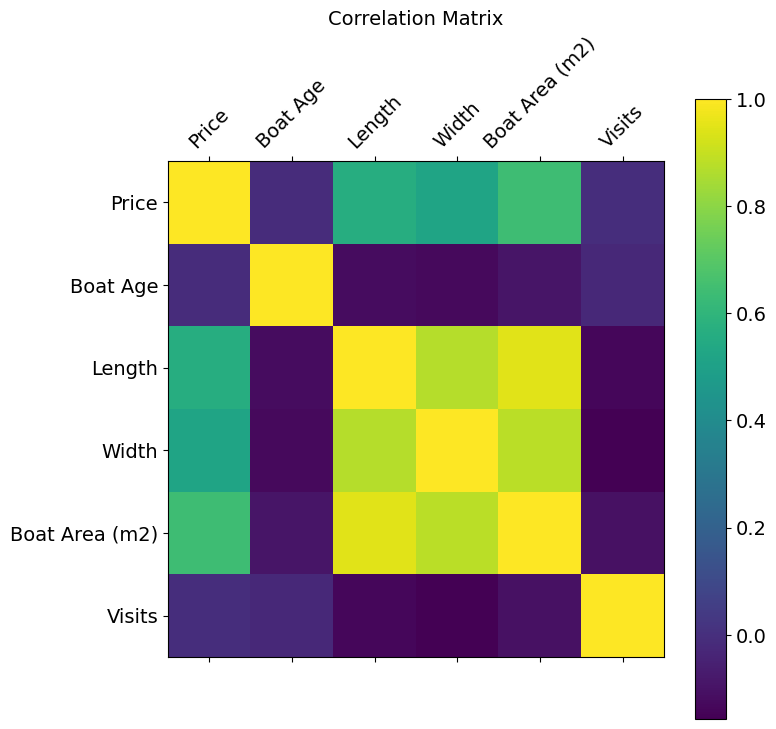

In [17]:
# Creating a correlation heatmap using matplotlib

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

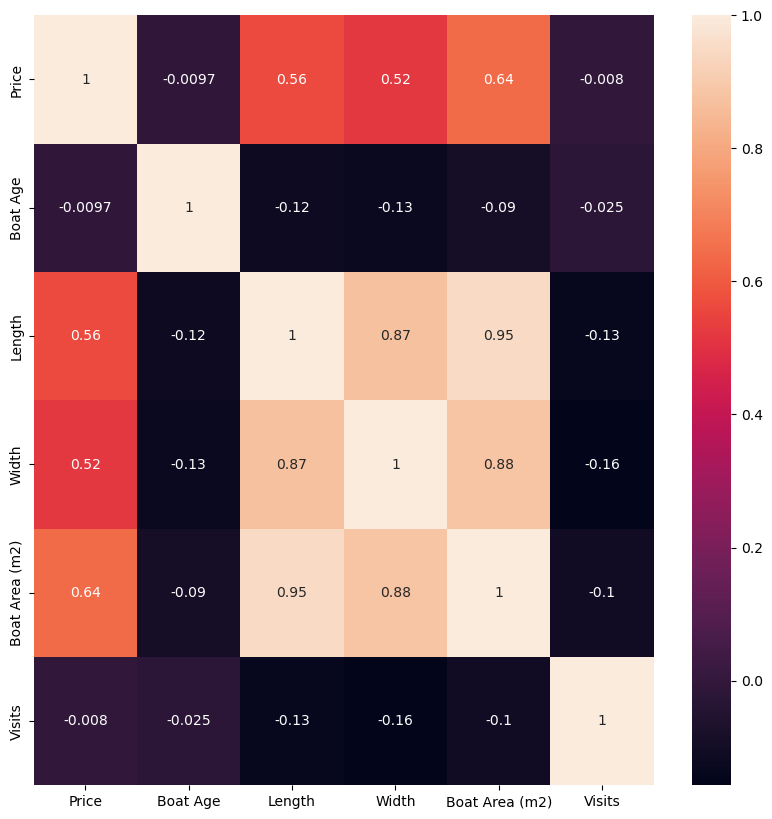

In [19]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

#### -The Price variable has a strong positive relationship with the variables Boat Area (0.64), Width (0.52) and Length (0.56), and no relationship with the variable Visits (0)
#### - The Boat Age variable has a weak positive relationship with the Width (0.13) and Length (0.12), and no relationship with the variable Visits (0)
#### - The Boat Area variables has a strong positive relationship with the variables Price (0.64), Width (0.88) and Length (0.95), and no relationship with the variable Visits (0)
#### - The variable Visits has no relationship with any of the other variables

# Multiple Linear Regression

In [28]:
# Defining x and y variables
x= df_sub.drop(['Visits'], axis=1).values
y= df_sub['Visits'].values

In [21]:
print(x)

[[3.537e+03 6.000e+00 4.000e+00 1.900e+00 7.600e+00]
 [3.490e+03 3.000e+00 4.000e+00 1.500e+00 6.000e+00]
 [3.996e+03 2.023e+03 3.690e+00 1.420e+00 5.240e+00]
 ...
 [4.499e+03 3.000e+00 4.400e+00 1.800e+00 7.920e+00]
 [4.300e+03 5.000e+00 4.370e+00 1.890e+00 8.260e+00]
 [4.006e+03 4.000e+00 3.600e+00 1.600e+00 5.760e+00]]


In [29]:
print(y)

[226  75 124 ... 354 266 194]


In [36]:
# split th dataset in traning and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [38]:
#Train the model on the training set
from sklearn.linear_model import LinearRegression
ml==LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [41]:
#Predict test set results 
y_pred=ml.predict(x_test)
print(y_pred)

[136.93862367 137.56872516 140.17590312 ... 132.90497429 128.21817667
 194.67851972]


In [44]:
ml.predict([[3537,6,4.00,1.90,7.60]])

array([213.28293163])

In [46]:
#Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.025100540449502606

####  Low value 

Text(0.5, 1.0, 'Actual vs Predicted')

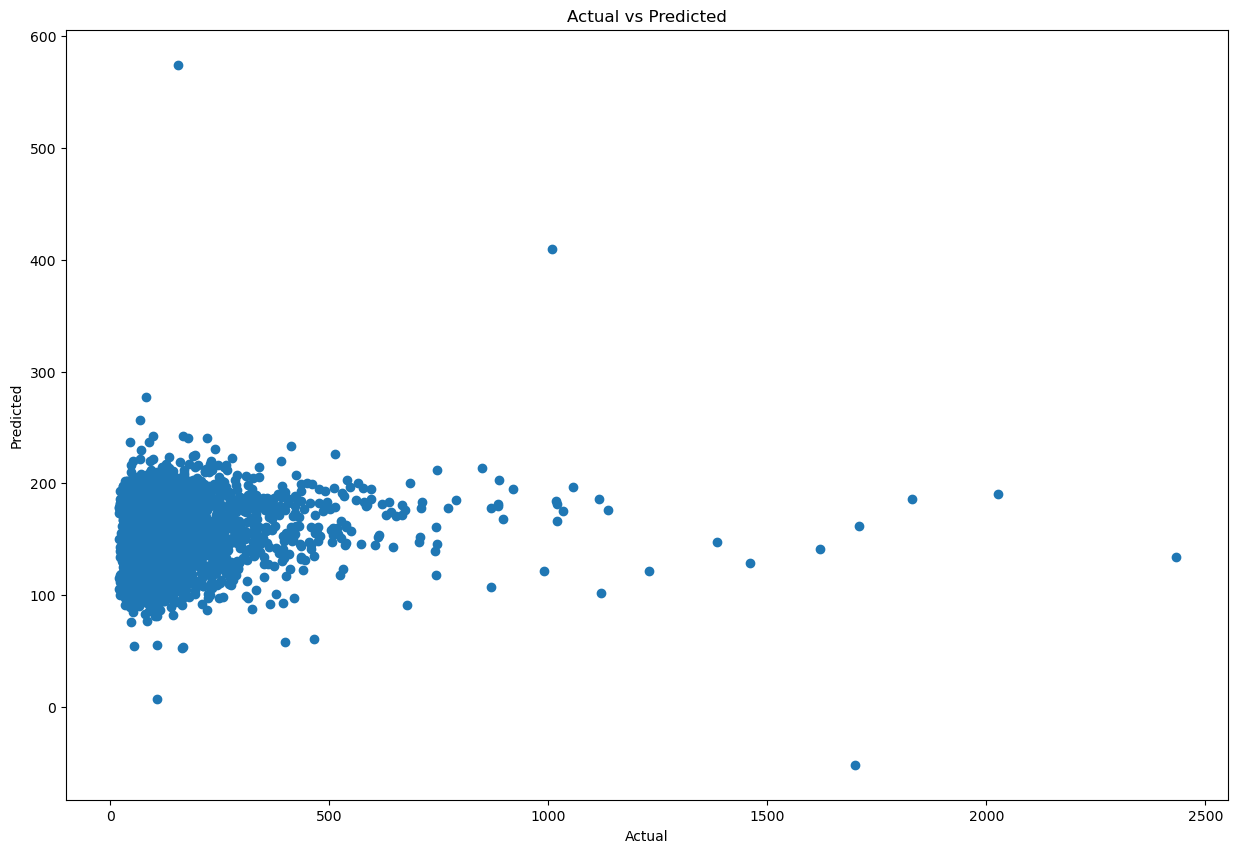

In [49]:
# Plot the results
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
